<a href="https://colab.research.google.com/github/KyleSprague/DCS_210/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tidyverse") 
library("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
install.packages("ggplot2") 
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
brexit = read.csv('brexit.csv')

In [4]:
#View(brexit)

In [5]:
'''
PLEASE IGNORE

altered_brexit <- brexit %>%
  mutate(
    region = fct_recode(
      region,
      `England and Wales` = "london",
      `England and Wales` = "rest_of_south",
      `England and Wales` = "midlands_wales",
      `England and Wales` = "north",
      Scotland = "scot"
    )
  )

count_df <- altered_brexit %>% 
  group_by(region) %>%
  count()
  
eng_wales_tot <- as.integer(count_df[1,2])
scot_tot <- as.integer(count_df[2,2])

eng_wales_tot  
scot_tot  
class(eng_wales_tot)

scot_prop <- altered_brexit %>%  
  filter(region == "Scotland") %>%
  group_by(opinion) %>% 
  count() %>%
  summarize(proportion = n/scot_tot)  

altered_brexit

eng_wales_prop <- altered_brexit %>% 
  filter(region == "England and Wales") %>% 
  group_by(opinion) %>% 
  count() %>%
  summarize(proportion = n/eng_wales_tot) 

'''
  

ERROR: ignored

In [ ]:
''' 
PLEASE IGNORE


 
ggplot(eng_wales_prop, aes(y = proportion, fill = proportion), bin_width = 1000) +
  geom_bar() +
  guides(fill = "none") +
  labs(title = "Was Britain right/wrong to vote to leave EU?",
       subtitle = "YouGov Survey Results, 2-3 September 2019",
       caption = "Source: bit.ly/2lCJZVg",
       x = NULL, y = NULL) + 
  scale_fill_manual(values = c("Wrong" = "#ef8a62",
                               "Right" = "#67a9cf",
                               "Don't know" = "gray")) +
  theme_minimal()

'''


##GRAPH 1 

I originally wanted to compare right, wrong, and don't know proportionalities for Scotland vs. England and Wales but I could not get the code to work. The goal of this graph is to emphasize the people who thought the decision was right by ordering from the apparent lowest fraction of people who thought Brexit was a good idea to the highest. 

Warning message:
“Unknown levels in `f`: london, rest_of_south, midlands_wales, north, scot”


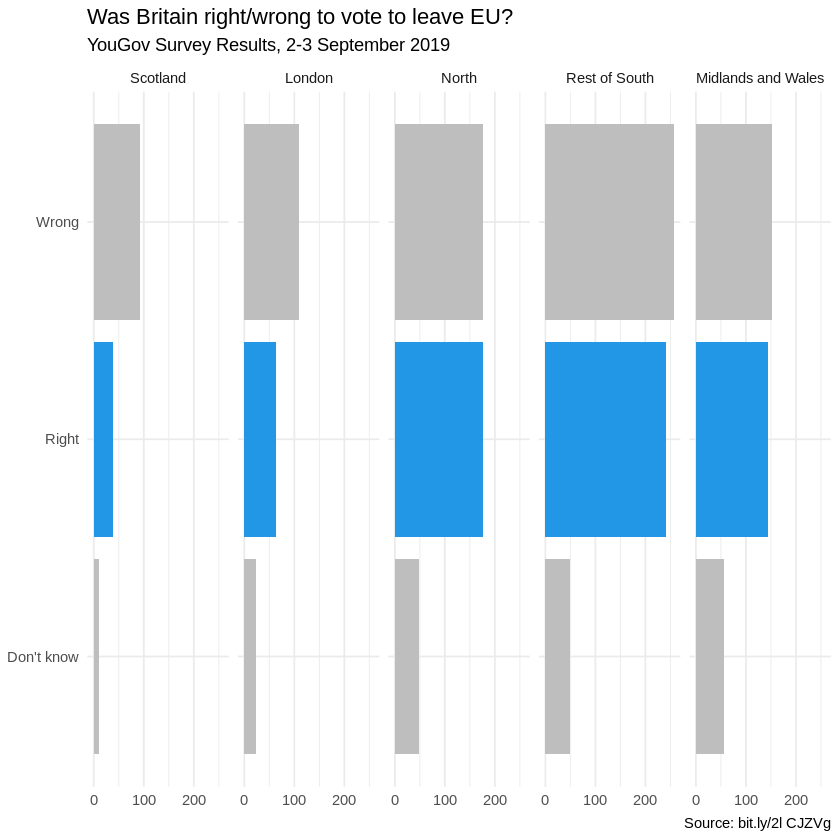

In [7]:
brexit <- brexit %>%
  mutate(
    region = fct_recode(
      region,
      `London` = "london",
      `Rest of South` = "rest_of_south",
      `Midlands and Wales` = "midlands_wales",
      `North` = "north",
      Scotland = "scot"
    )
  ) 

brexit_und <- brexit %>%
  arrange(factor(region, levels = c('Scotland', 'London', 'Rest of South', 'Midlands and Wales', 'North')))
  #code based on https://www.statology.org/arrange-rows-r/

ggplot(brexit_und, aes(y = opinion, fill = opinion)) +
  geom_bar() + 
  facet_wrap(~factor(region, levels=c('Scotland','London','North','Rest of South', 'Midlands and Wales')), nrow = 1)+ 
  guides(fill = "none") + 
  #facet code adapted from: https://stackoverflow.com/questions/14262497/fixing-the-order-of-facets-in-ggplot
  labs(title = "Was Britain right/wrong to vote to leave EU?",
       subtitle = "YouGov Survey Results, 2-3 September 2019",
       caption = "Source: bit.ly/2l CJZVg",
       x = NULL, y = NULL) +
  scale_fill_manual(values = c("Wrong" = "gray",
                               "Right" = "44af33",
                               "Don't know" = "gray")) +
  theme_minimal() 





##GRAPH 2: Goal: choose colors that deemphasize right and wrong and emphasize don't know; re-order facet order of appearance to show which regions had people who were most and least undecided in increasing order of proportion of "Don't Knows"

Warning message:
“Unknown levels in `f`: london, rest_of_south, midlands_wales, north, scot”


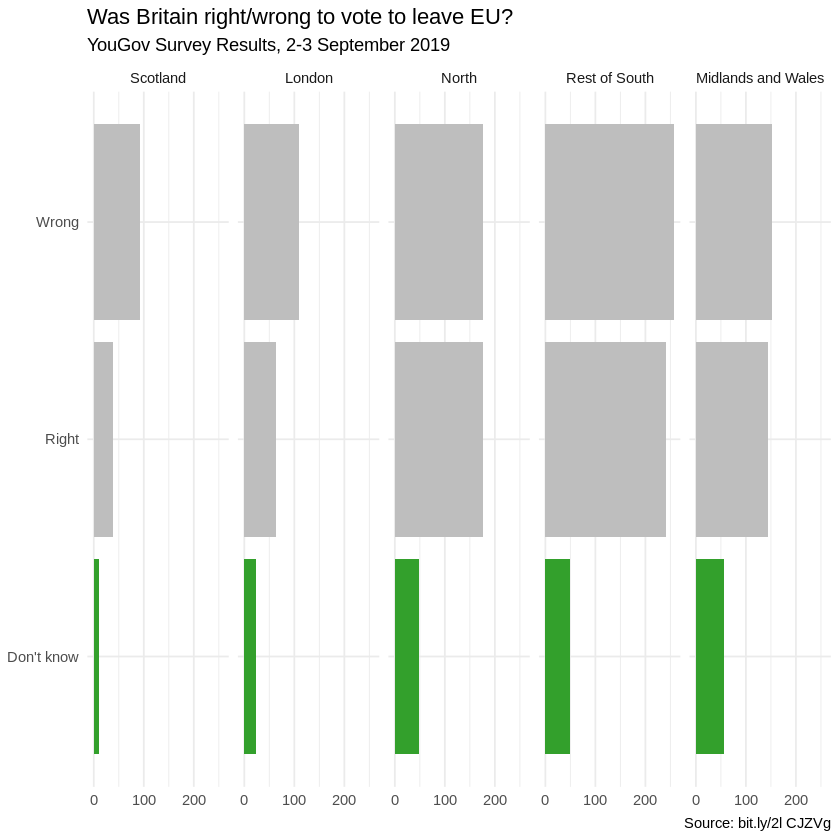

In [8]:
brexit <- brexit %>%
  mutate(
    region = fct_recode(
      region,
      `London` = "london",
      `Rest of South` = "rest_of_south",
      `Midlands and Wales` = "midlands_wales",
      `North` = "north",
      Scotland = "scot"
    )
  ) 

brexit_und <- brexit %>%
  arrange(factor(region, levels = c('Scotland', 'London', 'North', 'Rest of South', 'Midlands and Wales')))
  #code based on https://www.statology.org/arrange-rows-r/

ggplot(brexit_und, aes(y = opinion, fill = opinion)) +
  geom_bar() + 
  facet_wrap(~factor(region, levels=c('Scotland','London','North','Rest of South', 'Midlands and Wales')), nrow = 1)+ 
  guides(fill = "none") + 
  #facet code adapted from: https://stackoverflow.com/questions/14262497/fixing-the-order-of-facets-in-ggplot
  labs(title = "Was Britain right/wrong to vote to leave EU?",
       subtitle = "YouGov Survey Results, 2-3 September 2019",
       caption = "Source: bit.ly/2l CJZVg",
       x = NULL, y = NULL) +
  scale_fill_manual(values = c("Wrong" = "gray",
                               "Right" = "gray",
                               "Don't know" = "#33a02c")) +
  theme_minimal() 

##GRAPH 3 

Goal: emphasize the number of people who believed leaving the EU was the incorrect "Wrong" choice by reordering facets from the smallest proportion of people for a given region who believed the choice to be wrong to the largest proportion of people for another region who believed the choice to be wrong. Interestingly, the "Wrong" facet ordering is nearly the reverse of that for "Don't Know". 

Warning message:
“Unknown levels in `f`: london, rest_of_south, midlands_wales, north, scot”


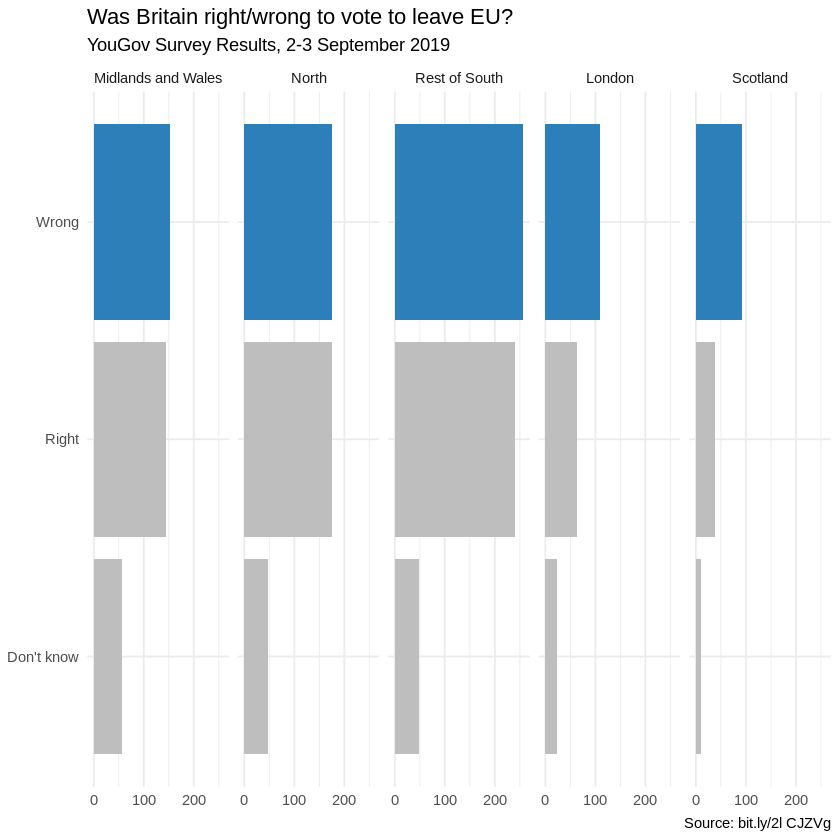

In [9]:
brexit <- brexit %>%
  mutate(
    region = fct_recode(
      region,
      `London` = "london",
      `Rest of South` = "rest_of_south",
      `Midlands and Wales` = "midlands_wales",
      `North` = "north",
      Scotland = "scot"
    )
  ) 


ggplot(brexit_und, aes(y = opinion, fill = opinion)) +
  geom_bar() + 
  facet_wrap(~factor(region, levels=c('Midlands and Wales','North','Rest of South','London', 'Scotland')), nrow = 1)+ 
  guides(fill = "none") + 
  #facet code adapted from: https://stackoverflow.com/questions/14262497/fixing-the-order-of-facets-in-ggplot
  labs(title = "Was Britain right/wrong to vote to leave EU?",
       subtitle = "YouGov Survey Results, 2-3 September 2019",
       caption = "Source: bit.ly/2l CJZVg",
       x = NULL, y = NULL) +
  scale_fill_manual(values = c("Wrong" = "#2c7fb8",
                               "Right" = "gray",
                               "Don't know" = "gray")) +
  theme_minimal() 